# Twitter Sentiment Analysis

Sampling Twitter Data with the Search API about a certain topic

In [420]:
!pip install twitter
!pip install tweepy

In [226]:
import tweepy as tw
import json
import pandas as pd
import csv
import re
import string

my_api_key = 'oJpnhPtow417C4xHxnzZ8icfS'
my_api_secret ='i7eVuKl5LFQ1jhyRX3xyjH6HYgwEZtq0Av6YOBtC965PJ8cR9g'
    
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth,wait_on_rate_limit=True)
search_word="Netflix"
if search_word == "Netflix":
    search_word = "Netflix" + " -filter:retweets"

else :
    search_word = search_word + " -filter:retweets"
    
print("My topic of interest is",search_word)
tweets_collected = []
for tweet in tw.Cursor(api.search_tweets, q = search_word, lang = 'en', since_id = "2019-05-30", tweet_mode = 'extended').items(300):
    tweets_collected.append(tweet._json)

outfile= open("tweets_collected.txt", "w")
for i in tweets_collected: 
    outfile.write(json.dumps(i))

My topic of interest is Netflix -filter:retweets


### Report some statistics about the tweets you collected and store the tweets in a file

* The topic of interest: Netflix


* The total number of tweets collected:  300


# Problem 2 (25 points): Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [227]:
from prettytable import PrettyTable  

#extracting "full_text" from the tweets_collected.txt local file as it has the complete tweet 
only_tweets = []
for i in tweets_collected:
    only_tweets.append(i['full_text'])

# cleaning and splitting the collected tweets by space
def strip_punctuations(line):
    for character in string.punctuation:
        line=line.replace(character,"")
    return line
# only_tweets= " ".join(only_tweets)
# only_tweets = only_tweets.replace("","")
# only_tweets = only_tweets.split(" ")

word_count = dict()
for line in only_tweets:
    line = strip_punctuations(line)
    words = line.split()
    for word in words:
        word=word.lower()
        if word not in word_count:
            word_count[word]=0
        word_count[word]+=1
#     words[item] = only_tweets.count(item)
#sorting the collected words in descending order
words = {key: val for key, val in sorted(word_count.items(), key = lambda ele: ele[1], reverse = True)}
#print(words)
#printing only the top 30 words from the words dictionary
sorted_words = dict(list(words.items())[0: 30]) 
#Using pretty table to plot the table
top_30_words = PrettyTable()
columns = ["Top 30 Words", "Count"]
top_30_words.add_column(columns[0], list(sorted_words.keys()))
top_30_words.add_column(columns[1], list(sorted_words.values()))
print("The Top 30 Words that are the most popular in my collection of tweets:\n",top_30_words)


The Top 30 Words that are the most popular in my collection of tweets:
 +--------------+-------+
| Top 30 Words | Count |
+--------------+-------+
|   netflix    |  277  |
|     the      |  195  |
|      on      |  108  |
|      to      |  106  |
|      i       |  100  |
|      a       |  100  |
|     and      |   90  |
|      is      |   89  |
|      of      |   69  |
|      in      |   66  |
|      it      |   65  |
|     for      |   59  |
|     you      |   52  |
|     that     |   49  |
|      so      |   43  |
|     this     |   42  |
|     but      |   31  |
|    watch     |   30  |
|      be      |   28  |
|   watching   |   26  |
|     out      |   24  |
|      me      |   24  |
|     has      |   24  |
|    about     |   24  |
|      my      |   23  |
|     show     |   23  |
|     was      |   23  |
|     like     |   22  |
|    series    |   22  |
|      if      |   22  |
+--------------+-------+


**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [228]:
popular_tweets = {}
#Getting the retweet count for each tweet and updating the popular_tweets dictionary
for i in tweets_collected:
    popular_tweets[i['full_text']] = i['retweet_count']
# Sorting the tweets in descending order
popular_tweets = {key: val for key, val in sorted(popular_tweets.items(), key = lambda ele: ele[1], reverse = True)}
#Taking the top 10 tweets from the sorted popular_tweets
top10_popular_tweets = dict(list(popular_tweets.items())[0: 10]) 
#Using pretty table to plot the table

top10_tweets = PrettyTable()
columns = ["Top 10 Tweets", "Count"]
top10_tweets.add_column(columns[0], list(top10_popular_tweets.keys()))
top10_tweets.add_column(columns[1], list(top10_popular_tweets.values()))
from prettytable import MSWORD_FRIENDLY  
  
top10_tweets.set_style(MSWORD_FRIENDLY)
top10_tweets.align["Top 10 Tweets"] = "l"
top10_tweets.align["Count"] = "l"
top10_tweets.format=True
print("The Top 10 tweets that are the most popular in my collection of tweets:",top10_tweets)

The Top 10 tweets that are the most popular in my collection of tweets: | Top 10 Tweets                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | Count |
| DAHMER is now All Time No. 2 on Netflix                                                                                         

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [229]:
just_tweets = []
for i in tweets_collected:
    just_tweets.append(i['full_text'])
just_tweets= " ".join(just_tweets)
just_tweets = just_tweets.replace("","")
just_tweets = just_tweets.split(" ")
words=dict()
for word in just_tweets:
    if word in words:
        words[word]=words[word]+1
    else:
        words[word]=1;
    
# words[item] = just_tweets.count(item)
words = {key: val for key, val in sorted(words.items(), key = lambda ele: ele[1], reverse = True)}

hashtags = {}
user_mentions ={}
for key,value in words.items():
    if '#' in key:
        hashtags[key] = value
    elif '@' in key:
        user_mentions[key] = value

top10_hashtags = PrettyTable()
columns = ["Top 10 Hashtags","Count"]
top10_hashtags.add_column(columns[0], list(list(hashtags.keys())[:10]))
top10_hashtags.add_column(columns[1], list(list(hashtags.values())[:10]))

print("The top 10 hashtags that are the most popular in my collection of tweets:\n",top10_hashtags)

top10_usermentions = PrettyTable()
columns = ["Top 10 user_mentions","Count"]
top10_usermentions.add_column(columns[0], list(list(user_mentions.keys())[:10]))
top10_usermentions.add_column(columns[1], list(list(user_mentions.values())[:10]))

print("\nThe top 10 user mentions that are the most popular in my collection of tweets:\n",top10_usermentions)

The top 10 hashtags that are the most popular in my collection of tweets:
 +------------------+-------+
| Top 10 Hashtags  | Count |
+------------------+-------+
|     #Netflix     |   10  |
|    #zonauang     |   3   |
| #TheMidnightClub |   2   |
|   #WarriorNun    |   2   |
|  #WarriorNunS2   |   2   |
|    #Avatrice     |   2   |
|  #DahmerMonster  |   2   |
| #GwinnettLibrary |   1   |
|        #2        |   1   |
|      #GCPL       |   1   |
+------------------+-------+

The top 10 user mentions that are the most popular in my collection of tweets:
 +----------------------+-------+
| Top 10 user_mentions | Count |
+----------------------+-------+
|       @netflix       |   56  |
|      @padavitos      |   5   |
|   @DiscussingFilm    |   5   |
|      @ramzpaul       |   4   |
|     @BobOmbWill      |   3   |
|   @BabyGirlAlfred    |   3   |
|          @           |   3   |
|   @cantw8tobeking    |   3   |
|    @kirawontmiss     |   2   |
|      @netflix.       |   2   |
+--------

* ------------------------

# Problem 3 (25 points): Getting "All" friends and "All" followers of a popular user in twitter


Choose a popular twitter user who has many followers. Since some popular users have millions of followers, it may take a very long time to get the follower list. Hence, we recommend you choosing a "popular" user with a reasonable number of followers, that your program can handle.

**1. Get the list of all friends and all followers of the twitter user.**

In [256]:
from functools import partial
from sys import maxsize

# # is it list of names or all details of friends
followers = list()
friends = list()
followers_ids= list()
friends_ids=list()
for page in tw.Cursor(api.get_followers, screen_name="thewillhallexp",
                        count=maxsize).pages(10):
    for i in page:
        followers.append(i._json['name'])
        followers_ids.append(i._json['id'])
for page in tw.Cursor(api.get_friends, screen_name="thewillhallexp",
                        count=maxsize).pages(10):
    for i in page:
        friends.append(i._json['name'])
        friends_ids.append(i._json['id'])

print("The friends list for the user thewillhallexp is:\n",friends)
print()
print("The followers list for the user thewillhallexp is:\n",followers)

    
    




The friends list for the user thewillhallexp is:
 ['MTG Data', 'Talisker Sleevesly', 'Jack Doyle / scryus', 'Oscar Christensen', 'Ultimate Guard', 'Chris', 'her.vs.her2', 'CaffeineLily', 'Ashlizzy Wizzy', 'Humans of Magic', 'Jeff Laubenstein - MTG, RPG Artist', 'rk post', 'Invasion Games', 'The Roku Channel', '常盤ゆい🐸《YUI TOKIWA》@TCG【YouTuber】ラスベガス楽しみ🔥', 'YRS TRULY', 'Chris - Confused about Magic 30', 'Brett Cooper', 'foxhoundfactory', 'James Keating', 'Skura', 'Paul Cheon', 'Andrea Mengucci', 'ExoticMTG', 'Alberto S. Ballesteros', 'Izunia.Motyl', 'Martin_G_Edits', 'Mattia Rizzi', 'Post Malone', 'KilgoreTrout503', 'Modfly Alters', 'Blocked By Jeff Hoogland', 'Union Jack Club', 'Victory Services Club', 'Nick Barber', 'Lionesses', '𝙹𝚎𝚜𝚜𝚒𝚌𝚊 𝙲𝚊𝚛𝚝𝚎𝚛 MILF ♡︎🔞', 'Jesper "Damage" Sørensen', 'runDisney', 'Wing Fest', 'Wing Fest', 'Beatriz Grancha "Alia" 🤍', 'AFG | BitBeaker', 'Luke May', 'Leonora', 'Eli "Hollywood" Loveman (BLM)', 'D-Spirits', 'Lost Arrow', 'Eurosatory', 'Andy', 'I/ITSEC', 'Danie

# **2. Plot 20 out of the followers, plot their ID numbers and screen names in a table.**



In [233]:
plot_foll_ids = followers_ids[:20]
plot_foll = followers[:20]

table_five = PrettyTable()
columns = ["Follower_IDs", "screen_name"]
table_five.add_column(columns[0], list(plot_foll_ids))
table_five.add_column(columns[1], list(plot_foll))
print(table_five)

+---------------------+------------------------+
|     Follower_IDs    |      screen_name       |
+---------------------+------------------------+
|      4251765429     |        AmuletGo        |
|      1774509476     |         Adam P         |
| 1579086633282015235 | iLoveMagicalGatherings |
|      303917875      |      Darius Breau      |
| 1360409714010411008 |         chaxm          |
| 1265784549436321792 |      zzealjGaming      |
| 1267749981319987200 |       La Gaulle        |
|       81922172      |     Nathan Hurley      |
| 1343339626422009856 |       AlexMTG86        |
|       44017949      |     sudoferraz.eth     |
| 1082851857867784192 |        Hippong         |
|      1236008598     |      Logan Haney       |
|      1643199853     |     Mick Björkman      |
| 1424118429951352841 |        otoninho        |
| 1024926375776411648 |        Tristan         |
| 1390803336186716162 |    Mathias Mazzocco    |
|  743522062115999749 |      Puuhaperkele      |
| 150210504850716262

**3. Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.**

In [234]:
plot_friend_ids = friends_ids[:20]
plot_friends = friends[:20]
table_six = PrettyTable()
columns = ["Friends_IDs", "screen_name"]
table_six.add_column(columns[0], list(plot_friend_ids))
table_six.add_column(columns[1], list(plot_friends))
print(table_six)


+---------------------+------------------------------------------------------------+
|     Friends_IDs     |                        screen_name                         |
+---------------------+------------------------------------------------------------+
| 1292845067670093827 |                          MTG Data                          |
| 1449529016407429126 |                     Talisker Sleevesly                     |
|      172782671      |                    Jack Doyle / scryus                     |
| 1008540228435361792 |                     Oscar Christensen                      |
|      2615092974     |                       Ultimate Guard                       |
| 1574016250627428353 |                           Chris                            |
| 1555619478943170561 |                        her.vs.her2                         |
| 1154092807742787585 |                        CaffeineLily                        |
|  706811861036081152 |                       Ashlizzy Wizzy     

**4. Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table.**

In [235]:
mutual_users = set(friends).intersection(followers)
mutual_user_ids = set(friends_ids).intersection(followers_ids)
table_seven = PrettyTable()
columns = ["User IDs", "screen_name"]
table_seven.add_column(columns[0], list(mutual_user_ids))
table_seven.add_column(columns[1], list(mutual_users))
print("The users who are in both friend list and follower list\n:",table_seven)


The users who are in both friend list and follower list
: +---------------------+------------------------------------------------------------+
|       User IDs      |                        screen_name                         |
+---------------------+------------------------------------------------------------+
| 1008540228435361792 |                         ExoticMTG                          |
| 1154092807742787585 |                     Talisker Sleevesly                     |
|  706811861036081152 |                     Oscar Christensen                      |
| 1574016250627428353 |                      Humans of Magic                       |
|  915260677622661120 |              Chris - Confused about Magic 30               |
|  966185951952293888 |                       Martin_G_Edits                       |
| 1449529016407429126 | 常盤ゆい🐸《YUI TOKIWA》@TCG【YouTuber】ラスベガス楽しみ🔥 |
| 1133735981813657601 |                           Chris                            |
|  827608860160569345 |  

* ------------------------

# Problem 4 (25 points): Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a question that Twitter data could help answer.
* Decribe the case and solve it using Twitter data.

In [294]:
import re 
import tweepy as tw
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob 
from sys import maxsize

fetched_tweets = api.user_timeline(screen_name="JoeBiden", lang = 'en', tweet_mode = 'extended', count=100)
df = pd.DataFrame([tweet.full_text for tweet in fetched_tweets], columns=['Tweets'])
df.head()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nivi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Unexpected parameter: lang


,Tweets
0,"With only 28 days until the midterm elections,..."
1,Ask yourself: Do you want to put your Social S...
2,Every single Democrat voted for the Inflation ...
3,Republicans want a national ban on abortion—bu...
4,The CHIPs and Science Act will help ensure ten...


In [295]:
# polarity=0
# for tweet in fetched_tweets:
#     final_text = tweet.full_text.replace('RT','')
#     if final_text.startswith(' @'):
#         position=final_text.index(':')
#         final_text=final_text[position+2:]
#     analysis= TextBlob(final_text)
#     polarity += analysis.polarity
# print(polarity)
def cleanText(text):
    text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
    text = re.sub('RT','',text)
    text = re.sub(r'#','',text)
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    text = [word for word in text_tokens if not word in stopwords.words()]
    text = ' '.join(text)
    return text
df['Tweets']=df['Tweets'].apply(cleanText)
df.head()

,Tweets
0,With 28 days midterm elections stakes clear Re...
1,Ask Do put Social Security hands Ted Cruz Marj...
2,Every single Democrat voted Inflation Reductio...
3,Republicans national ban abortionbut give Demo...
4,The CHIPs Science Act ensure tens thousands hi...


In [301]:
  # This function is used to stem the given sentence
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSentiment(text):
  # Returns the sentiment based on the polarity of the input TextBlob object
    if TextBlob(text).sentiment.polarity > 0:
        return 'positive'
    elif TextBlob(text).sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df['Sentiment']=df['Tweets'].apply(getSentiment)

df.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,With 28 days midterm elections stakes clear Re...,0.641667,0.450000,positive
1,Ask Do put Social Security hands Ted Cruz Marj...,0.066667,0.033333,positive
2,Every single Democrat voted Inflation Reductio...,0.214286,-0.071429,negative
3,Republicans national ban abortionbut give Demo...,0.000000,0.000000,neutral
4,The CHIPs Science Act ensure tens thousands hi...,0.000000,0.000000,neutral


In [303]:
ptweets = df[df['Sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['Sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Neutral tweets {100 - p_perc - n_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 38.0 %
Neutral tweets 43.0 %
Negative tweets 19.0 %


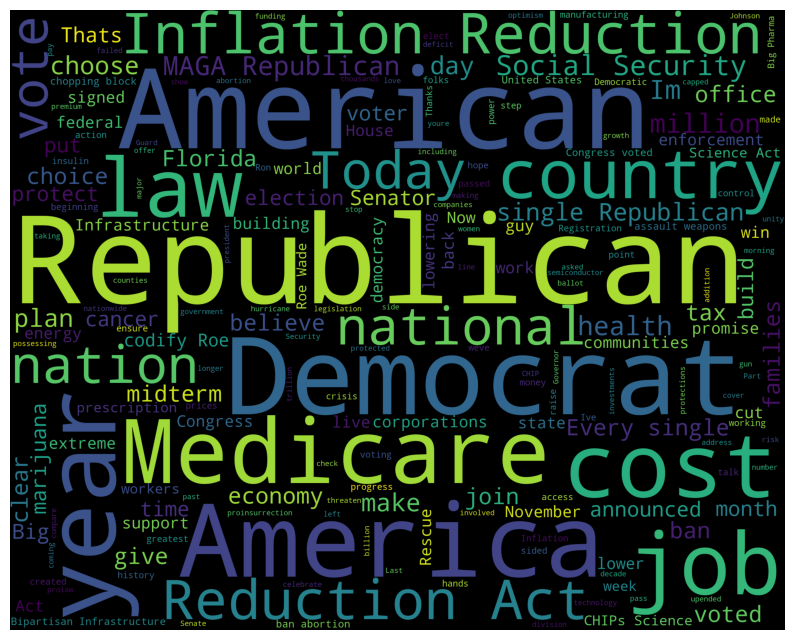

In [305]:
twt = " ".join(df['Tweets'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=2500, height=2000).generate(twt)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
